<a href="https://colab.research.google.com/github/H5Y0UNG/20_group/blob/main/note_10_(%EA%B9%80%ED%98%B8%EC%98%81%2C_%ED%99%8D%EC%8A%B9%EC%A1%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 코랩에서 실행되는 노트북인가요?
IS_COLAB = "google.colab" in sys.modules

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("감지된 GPU가 없습니다. GPU가 없으면 CNN은 매우 느릴 수 있습니다.")
    if IS_COLAB:
        print("런타임 > 런타임 유형 변경 메뉴를 선택하고 하드웨어 가속기로 GPU를 고르세요.")

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

흑백 이미지와 컬러 이미지 출력을 위한 유틸리티 함수:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

# 합성곱이란 무엇인가?

7x7의 필터를 사용하여 수직필터, 수평필터를 만든다.

strides는 1

padding="SAME"으로 합성곱을 통해 나온 결과의 크기가 맨 처음 사진과 동일하도록 패팅을 추가한다.



[[[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
 

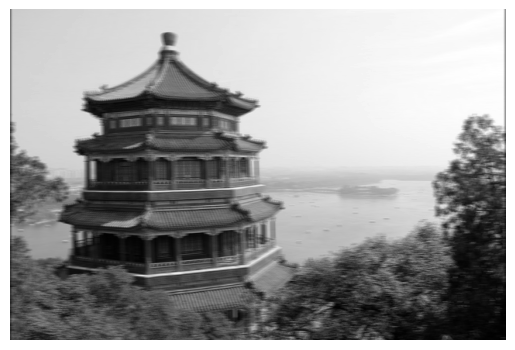

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# 샘플 이미지를 로드합니다.
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 2개의 필터를 만듭니다.
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # 수직선
print(filters)
filters[3, :, :, 1] = 1  # 수평선
print(filters)

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # 첫 번째 이미지의 두 번째 특성맵을 그립니다.
plt.axis("off") # 책에는 없습니다.
plt.show()

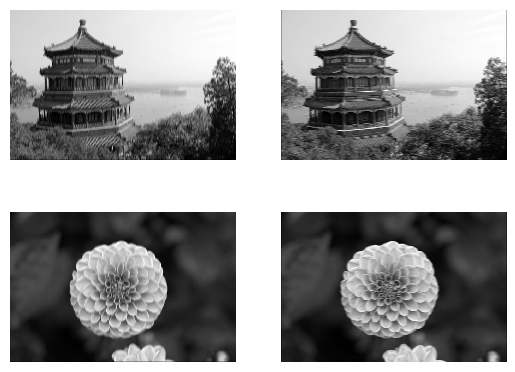

In [ ]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

수직,수평 필터를 사용하여 합성곱을 하여 특성맵을 만들었을 때 사진

첫번째 필터와 두번째 필터는 대부분 0이고 특정 줄의 1이 존재하는 곳에서 합성곱되어 그 쪽 부분에서만 특징이 살려져 수평 혹은 수직으로 보이게 결과물이 나온다.

그림 저장 china_original


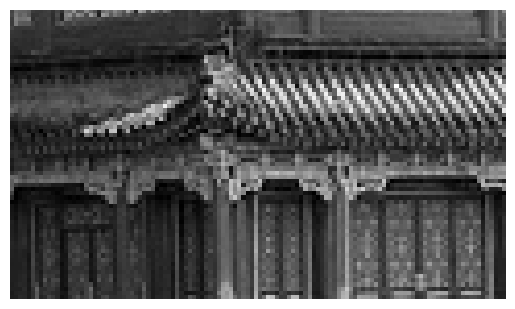

그림 저장 china_vertical


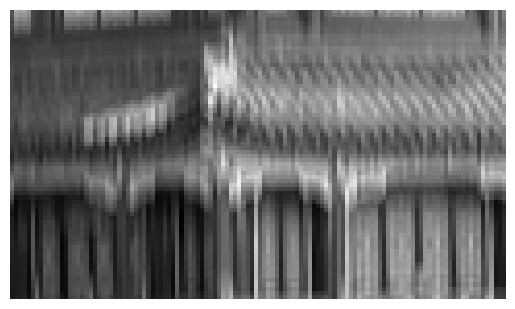

그림 저장 china_horizontal


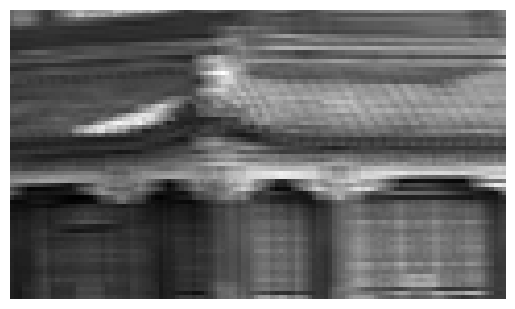

In [ ]:
plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

각 필터가 어떻게 생겼는지 확인

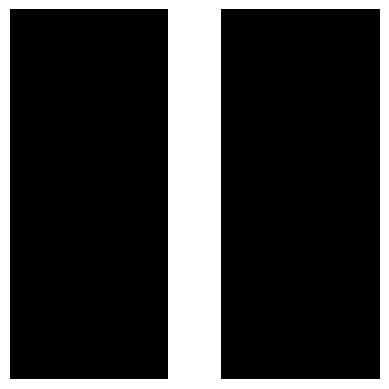

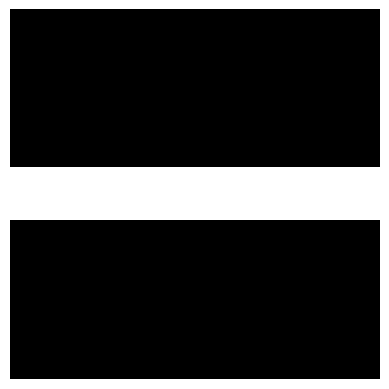

In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

## 합성곱 층

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1,
                           padding="SAME", activation="relu", input_shape=outputs.shape)

In [ ]:
outputs.shape

TensorShape([2, 427, 640, 2])

출력 크기= (입력 크기−커널 크기)/스트라이드 +1

커널의 크기는 7, 스트라이드는 1이고 입력 크기는 TensorShape([2, 427, 640, 2])으로

높이 427, 너비는 640으로 (427-7)+1 = 421, (640-7)+1=634로

TensorShape([2, 421, 634, 2])가 된다.

In [ ]:
conv_outputs = conv(images)
conv_outputs.shape

TensorShape([2, 427, 640, 2])

출력은 4D 텐서입니다. 차원은 배치 크기, 높이, 너비, 채널입니다. 2개의 이미지를 입력으로 사용했기 때문에 첫 번째 차원(배치 크기)는 2입니다. 다음 두 차원은 출력 특성맵의 높이와 너비입니다. `padding="SAME"`와 `strides=1`로 설정했기 때문에 출력 특성맵의 높이와 너비는 입력 이미지와 같습니다(이 경우 427×640). 마지막으로 이 합성곱 층은 2개의 필터를 사용합니다. 따라서 마지막 차원의 크기는 2입니다. 즉 입력 이미지마다 2개의 특성맵이 출력됩니다.

필터를 통해 필터를 어떻게 설정했을 때 이미지가 어떤 식으로 변화하는지 알 수 있다.

필터로 인해서 특정 부분이나 색의 특징들이 사라지고 필터의 1인 부분들만 특징이 살아남게 된다.

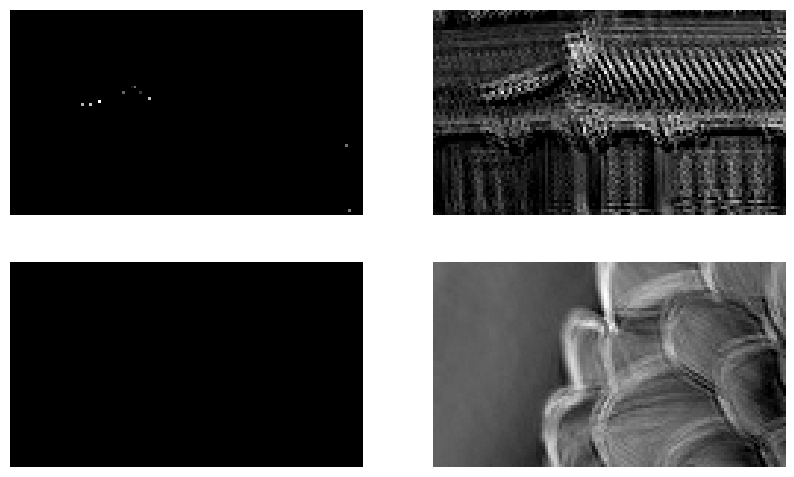

In [ ]:
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()

편향을 0으로 지정하기

In [ ]:
conv.set_weights([filters, np.zeros(2)])

In [ ]:
conv_outputs = conv(images)
conv_outputs.shape

TensorShape([2, 427, 640, 2])

왼쪽 사진은 수직 필터에 의해 수직의 특징만 남았고

오른쪽 사진은 수평 필터에 의해 수평의 특징만 남게 된다.

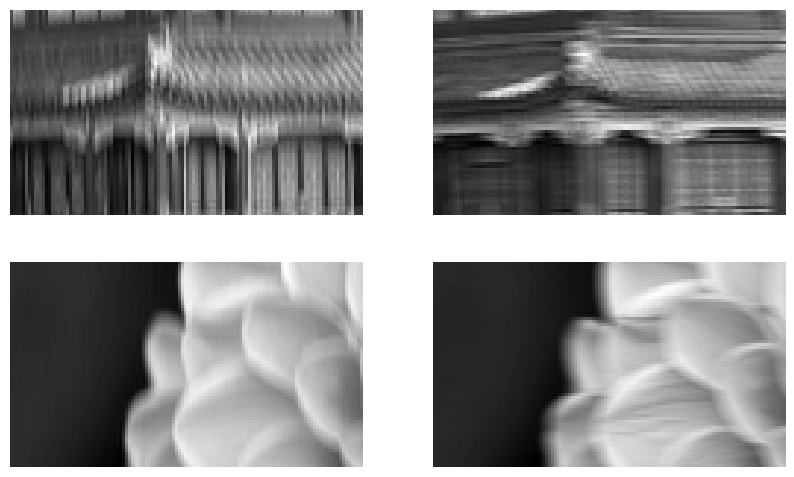

In [ ]:
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()

## VALID vs SAME 패딩

In [ ]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [ ]:
def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [ ]:
def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

padding 옵션을 SAME으로 하게 되면 결과로 나온 특성 맵의 크기가 처음과 동일하도록 패딩을 늘려주고 VALID로 하게 되면 크기가 줄어든 상태로 결과가 나오게 된다.

In [ ]:
kernel_size = 7
strides = 2

conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))

# conv_same의 가중치를 생성하기 위해 build() 메서드를 호출해야 합니다.
conv_same.build(tf.TensorShape(images.shape))

# conv_valid의 가중치를 conv_same으로 복사합니다.
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images.astype(np.float32))

assert np.allclose(valid_output.numpy(), same_output.numpy())

conv_valid는 conv_same 보다 특성 맵이 작지만 manual_same_padding으로 같게 만들고
가중치를 복사한 후 np.allclose(valid_output.numpy(), same_output.numpy())을 수행했을 때
True를 반환하여 같게 만들 수 있다.

In [ ]:
np.allclose(valid_output.numpy(), same_output.numpy())

True

# 풀링 층

## 최대 풀링

pool_size 2로 이미지가 절반 크기로 줄었다.

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

그림 저장 china_max_pooling


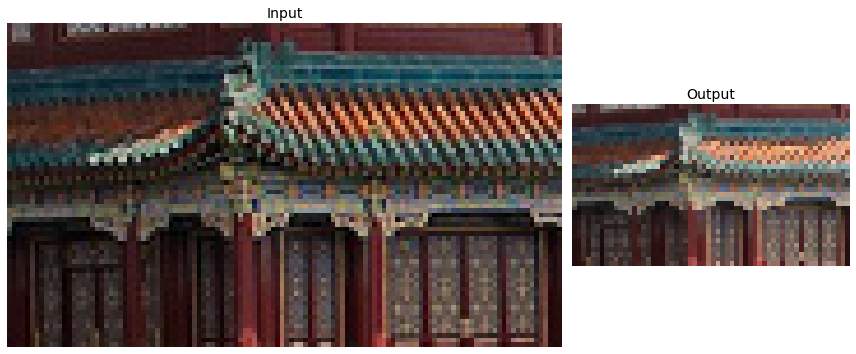

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # 첫 번째 이미지 그리기
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # 첫 번째 이미지 출력 그리기
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()

## 깊이 방향(depth-wise) 풀링

In [ ]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

In [ ]:
depth_pool = DepthMaxPool(3)
with tf.device("/cpu:0"): # 아직 GPU 커널이 없습니다.
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

또는 `Lambda` 층을 사용합니다:

In [ ]:
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))
with tf.device("/cpu:0"): # 아직 GPU 커널이 없습니다.
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

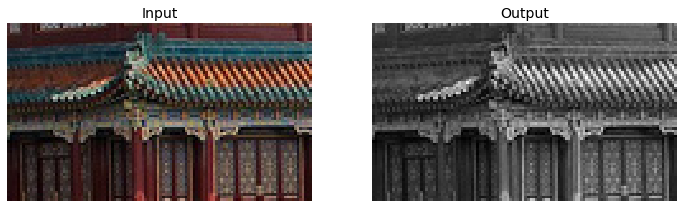

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plot_color_image(cropped_images[0])  # 첫 번째 이미지 그리기
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plot_image(depth_output[0, ..., 0])  # 첫 번째 이미지 출력 그리기
plt.axis("off")
plt.show()

## 평균 풀링

In [ ]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [ ]:
output_avg = avg_pool(cropped_images)

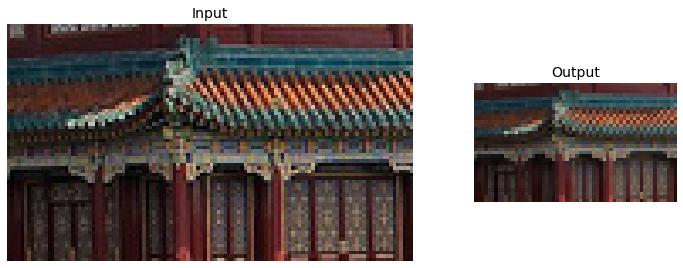

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # 첫 번째 이미지 그리기
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # 첫 번째 이미지 출력 그리기
ax2.axis("off")
plt.show()

## 전역 평균 풀링

In [ ]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45951638, 0.33423486]], dtype=float32)>

In [ ]:
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45951638, 0.33423486]], dtype=float32)>

# CNN으로 패션 MNIST 문제 풀기

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step


1. 케라스 Sequential모델의 첫번째 레이어의 입력 데이터는 28x28 크기의 사진에 1이므로 흑백이고 커널사이즈는 7, 필터는 64개이다.

2. 그 후 MaxPooling2D의 pool_size=2로 같은 커널안의 최대값으로 구성된 절반 크기의 특성맵을 가진다.

3,4. 128개의 필터로 합성곱을 거친다.

Flatten으로 1차원으로 만든 후에
활성함수 relu인 은닉층, 절반의 노드를 학습에서 제외시키는 Dropout(0.5) 등을 거치게 되고

최종적으로 활성함수 softmax를 통해 10개의 출력 결과가 나오게 된다.


In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # 새로운 이미지처럼 사용합니다
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 17s 8ms/step - loss: 0.7023 - accuracy: 0.7551 - val_loss: 0.3801 - val_accuracy: 0.8596
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4139 - accuracy: 0.8589 - val_loss: 0.3281 - val_accuracy: 0.8842
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3577 - accuracy: 0.8785 - val_loss: 0.3055 - val_accuracy: 0.8856
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3239 - accuracy: 0.8913 - val_loss: 0.2884 - val_accuracy: 0.8922
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3081 - accuracy: 0.8956 - val_loss: 0.2857 - val_accuracy: 0.8966
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2902 - accuracy: 0.9012 - val_loss: 0.2900 - val_accuracy: 0.8952
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2770 - accuracy: 0.9051 - val_loss: 0.2816 - val_ac

LeNet은 출력층이 각 뉴런에서 입력 벡터와 가중치 벡터 사이의 유클리드 거리를 출력하는 간단한 CNN 구조를 가졌다.

AlexNet은 합성곱 층 위에 풀링 층을 쌓지 않고 바로 합성곱 층끼리 쌓는다.

드롭 아웃을 50% 비율로 적용하거나 수평 뒤집기, 간격 이동, 조명 변경 등 데이터 증식을 수행하거나 정규화인 LRN을 사용하여 성능을 높혔다.

GoogLeNet은 인셉션 모듈을 사용하여 효과적으로 파라미터를 사용했다.

VGGNet은 많은 개수의 필터를 사용하지만 3x3 필터만을 사용한다

ResNet은 152개 층으로 구성

152개의 층이기 때문에 너무 깊어 역전파 과정에서 가중치 소실이 일어날 수 있다.

잔차 네트워크를 사용하여 일부 레이어를 스킵하여 가중치 소실을 막아냈다.


Xception은 GoogLeNet과 ResNet의 합성

채널하고 depth를 분리하여 합성곱에서 계산이 많이 줄어든다.

SENet은 GoogLeNet의 인셉션 모듈과 ResNet의 잔차유닛에 SE block을 추가하여 성능을 끌어올렸다.

처음에 뉴런 수를 상당히 줄여 압축시킨 후 다시 정상화 시켜 성능을 높혔다.

MobileNet은 리소스가 제한된 환경에서 효율적인 계산을 하기 위해 계산을 많이 잡아먹는 채널을 분리시키고 하나로 만들었다.


## ResNet-34

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       